In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#loading the data
data=pd.read_csv('C:/Users/Stephen/Downloads/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
#checking if data has been duplicated
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
data.shape

(10000, 14)

In [7]:
#describing the data
data.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [8]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

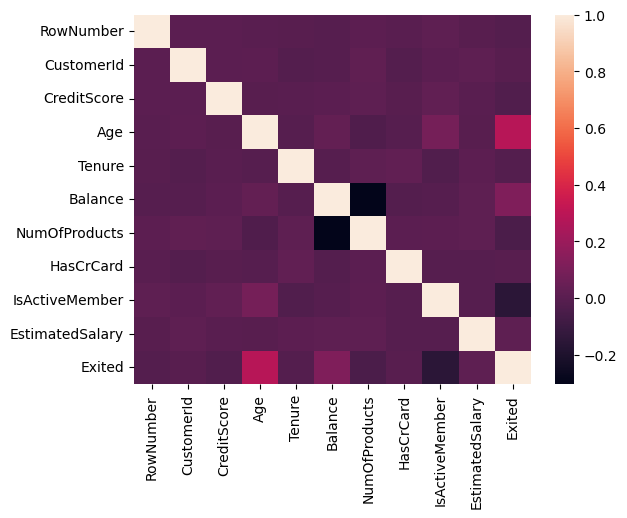

In [9]:
#getting the heatmap
sns.heatmap(data.corr())

In [13]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print (x)

[[ 1.02018244]
 [-1.43528183]
 [ 0.9773884 ]
 [ 1.03639913]
 [ 0.82930326]
 [ 1.25729351]
 [ 0.80456741]
 [-1.69726878]
 [ 0.64968027]
 [ 1.09901557]
 [ 0.24918759]
 [-0.66883483]
 [ 0.93497331]
 [ 1.01052605]
 [ 1.04478349]
 [-1.39842977]
 [ 0.57239493]
 [ 0.86585745]
 [ 1.20657196]
 [ 1.08290716]
 [ 0.79548873]
 [ 0.92279708]
 [-0.93868155]
 [-0.30477745]
 [-0.65707299]
 [ 0.80351886]
 [-0.73197235]
 [ 0.88614994]
 [ 0.83224   ]
 [ 0.20671188]
 [-1.76255709]
 [-1.89381503]
 [ 0.23283291]
 [-2.15088173]
 [-0.49924403]
 [ 0.67345891]
 [ 1.08217157]
 [-1.22571317]
 [ 0.96185189]
 [-1.2386474 ]
 [ 1.19341805]
 [-1.73617052]
 [-1.39527485]
 [ 1.04456627]
 [ 1.10967785]
 [ 1.00675712]
 [ 0.01145827]
 [ 0.711357  ]
 [-0.87459154]
 [-1.10395968]
 [-1.7022908 ]
 [ 1.18537233]
 [-1.76870512]
 [-2.97138831]
 [-0.55663561]
 [ 0.74798437]
 [ 0.72828   ]
 [ 0.05022924]
 [-1.03742583]
 [ 2.33126409]
 [ 0.67168954]
 [-0.86899911]
 [ 0.79831728]
 [-1.64265381]
 [ 0.99916694]
 [-0.51189515]
 [-2.46199

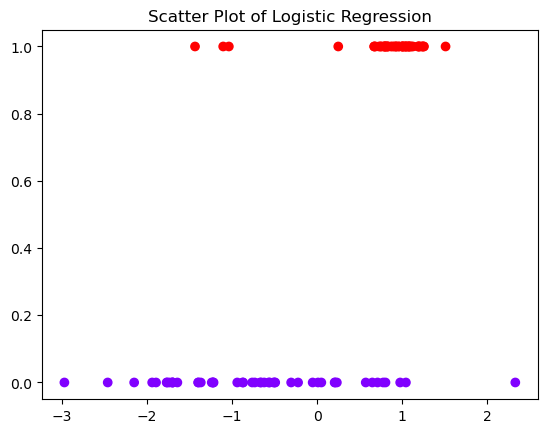

In [14]:
#getting the scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [15]:
#Splitting the datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [16]:
#getting the data shape
x_train.shape

(75, 1)

In [17]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = log_model.predict(x_test)

In [19]:
#printing the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 9,  4],
       [ 0, 12]], dtype=int64)

In [22]:
#getting the classification report
from sklearn.metrics import classification_report

In [23]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.69      0.82        13\n           1       0.75      1.00      0.86        12\n\n    accuracy                           0.84        25\n   macro avg       0.88      0.85      0.84        25\nweighted avg       0.88      0.84      0.84        25\n'

In [24]:
#getting the accuracy score
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred)

0.84